# **Assignment 8: Data Visualization with Matplotlib & Seaborn**

---

## **Introduction**

### Dataset: Red Wine Quality Dataset

**Source:** [UCI Machine Learning Repository - Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality)

**Description:** This dataset contains physicochemical properties and quality ratings of red wine samples from the north of Portugal. It includes 1,599 samples with 11 input variables (based on physicochemical tests) and 1 output variable (quality score from 0-10).

**Why I chose this dataset:** I selected this dataset because it provides a rich collection of continuous numerical variables that are perfect for demonstrating various visualization techniques. The relationships between chemical properties and wine quality offer interesting patterns to explore, and the dataset is clean enough to focus on visualization while still requiring some data wrangling.

---

## **Data Exploration**

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

In [26]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# Display dataset shape
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n" + "="*80 + "\n")

# Display column names and data types
print("Column names and data types:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9       0.08   
1            7.8              0.88         0.00             2.6       0.10   
2            7.8              0.76         0.04             2.3       0.09   
3           11.2              0.28         0.56             1.9       0.07   
4            7.4              0.70         0.00             1.9       0.08   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   
2                 15.0                  54.0      1.0  3.26       0.65   
3                 17.0                  60.0      1.0  3.16       0.58   
4                 11.0                  34.0      1.0  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

In [27]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())
print("\n" + "="*80 + "\n")

# Display mean and median for each column
print("Mean values:")
print(df.mean())
print("\n")
print("Median values:")
print(df.median())
print("\n")
print("Quartiles (25%, 50%, 75%):")
print(df.quantile([0.25, 0.5, 0.75]))
print("\n" + "="*80 + "\n")

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count    1599.00              1599.00               1599.00  1.60e+03   
mean        0.09                15.87                 46.47  9.97e-01   
std         0.05                10.46                 32.90  1.89e-03   
min         0.01                 1.00           

In [28]:
# Check for missing values
print("Missing Value Information:")
print(df.isnull().sum())
print("\n")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
print("\n" + "="*80 + "\n")

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("\n" + "="*80 + "\n")

# Display information about wine quality distribution
print("Wine Quality Distribution:")
print(df['quality'].value_counts().sort_index())
print("\n")
print(f"Minimum quality: {df['quality'].min()}")
print(f"Maximum quality: {df['quality'].max()}")
print(f"Average quality: {df['quality'].mean():.2f}")

Missing Value Information:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Total missing values: 0
Percentage of missing values: 0.00%


Number of duplicate rows: 240


Wine Quality Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


Minimum quality: 3
Maximum quality: 8
Average quality: 5.64


---

## **Data Wrangling**

In [29]:
# Create a copy of the dataframe for wrangling
df_clean = df.copy()

# Remove any duplicate rows
print(f"Rows before removing duplicates: {df_clean.shape[0]}")
df_clean = df_clean.drop_duplicates()
print(f"Rows after removing duplicates: {df_clean.shape[0]}")
print("\n")

# Create quality categories (Low, Medium, High)
def categorize_quality(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Medium'
    else:
        return 'High'

df_clean['quality_category'] = df_clean['quality'].apply(categorize_quality)
print("Quality categories created:")
print(df_clean['quality_category'].value_counts())
print("\n")

# Create a new feature: total acidity
df_clean['total_acidity'] = df_clean['fixed acidity'] + df_clean['volatile acidity']
print("Created new feature: total_acidity")
print(f"Total acidity range: {df_clean['total_acidity'].min():.2f} - {df_clean['total_acidity'].max():.2f}")
print("\n")

# Detect and handle outliers using IQR method for alcohol content
Q1 = df_clean['alcohol'].quantile(0.25)
Q3 = df_clean['alcohol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_alcohol = df_clean[(df_clean['alcohol'] < lower_bound) | (df_clean['alcohol'] > upper_bound)]
print(f"Number of outliers in alcohol content: {len(outliers_alcohol)}")
print(f"Outlier bounds: {lower_bound:.2f} - {upper_bound:.2f}")
print("\n")

# Display final cleaned dataset info
print("Final cleaned dataset shape:", df_clean.shape)
print("\nData types after wrangling:")
print(df_clean.dtypes)

Rows before removing duplicates: 1599
Rows after removing duplicates: 1359


Quality categories created:
quality_category
Medium    1112
High       184
Low         63
Name: count, dtype: int64


Created new feature: total_acidity
Total acidity range: 5.12 - 16.29


Number of outliers in alcohol content: 12
Outlier bounds: 7.10 - 13.50


Final cleaned dataset shape: (1359, 14)

Data types after wrangling:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_category         object
total_acidity           float64
dtype: object


---

## **Visualizations**

### **Part 1: Matplotlib Plots**

In [30]:
# Set the overall style for better-looking plots
plt.style.use('default')

#### **Plot 1: Scatter Plot with Multiple Customizations**

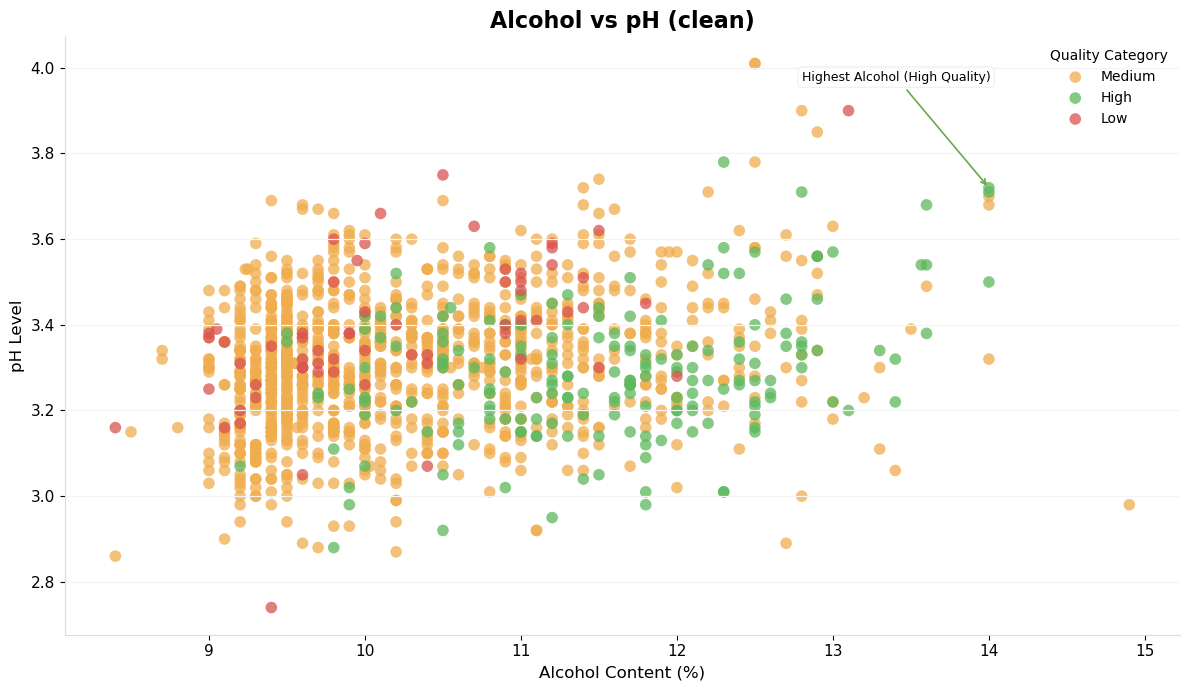

Clean scatter: reduced spines, lighter grid, no heavy marker edges, and minimal legend.


In [31]:
# Create a figure and axis (data-ink optimized)
fig, ax = plt.subplots(figsize=(12, 7))

# Create scatter plot with different colors for quality categories (lighter ink)
colors = {'Low': '#d9534f', 'Medium': '#f0ad4e', 'High': '#5cb85c'}
for category in df_clean['quality_category'].unique():
    data = df_clean[df_clean['quality_category'] == category]
    ax.scatter(data['alcohol'], data['pH'], 
               c=colors[category], 
               label=category,
               alpha=0.75,           # moderate transparency
               s=70,                 # moderate marker size
               marker='o',
               edgecolors='none')      # remove heavy edges to reduce ink

# Clean axes: remove non-essential spines and reduce grid ink
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')
ax.set_title('Alcohol vs pH (clean)', fontsize=16, fontweight='bold')
ax.set_xlabel('Alcohol Content (%)', fontsize=12)
ax.set_ylabel('pH Level', fontsize=12)

# Light grid on y-axis only
ax.grid(axis='y', color='#F5F5F5', linewidth=0.9)

# Minimal legend (frame off) - prefer direct annotations when possible
leg = ax.legend(title='Quality Category', fontsize=10, frameon=False, loc='upper right')

# Add subtle annotation for most alcoholic high-quality wine
high_quality_wines = df_clean[df_clean['quality'] >= 7]
if len(high_quality_wines) > 0:
    best_wine_idx = high_quality_wines['alcohol'].idxmax()
    best_wine = df_clean.loc[best_wine_idx]
    ax.annotate('Highest Alcohol (High Quality)', 
                xy=(best_wine['alcohol'], best_wine['pH']),
                xytext=(best_wine['alcohol'] - 1.2, best_wine['pH'] + 0.25),
                arrowprops=dict(arrowstyle='->', color='#6AA84F', lw=1.2),
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#EEEEEE', alpha=0.8))

ax.tick_params(axis='both', labelsize=11)
plt.tight_layout()
plt.show()

print("Clean scatter: reduced spines, lighter grid, no heavy marker edges, and minimal legend.")

#### **Plot 2: Multi-Plot (Subplots) with Histograms and Line Customization**

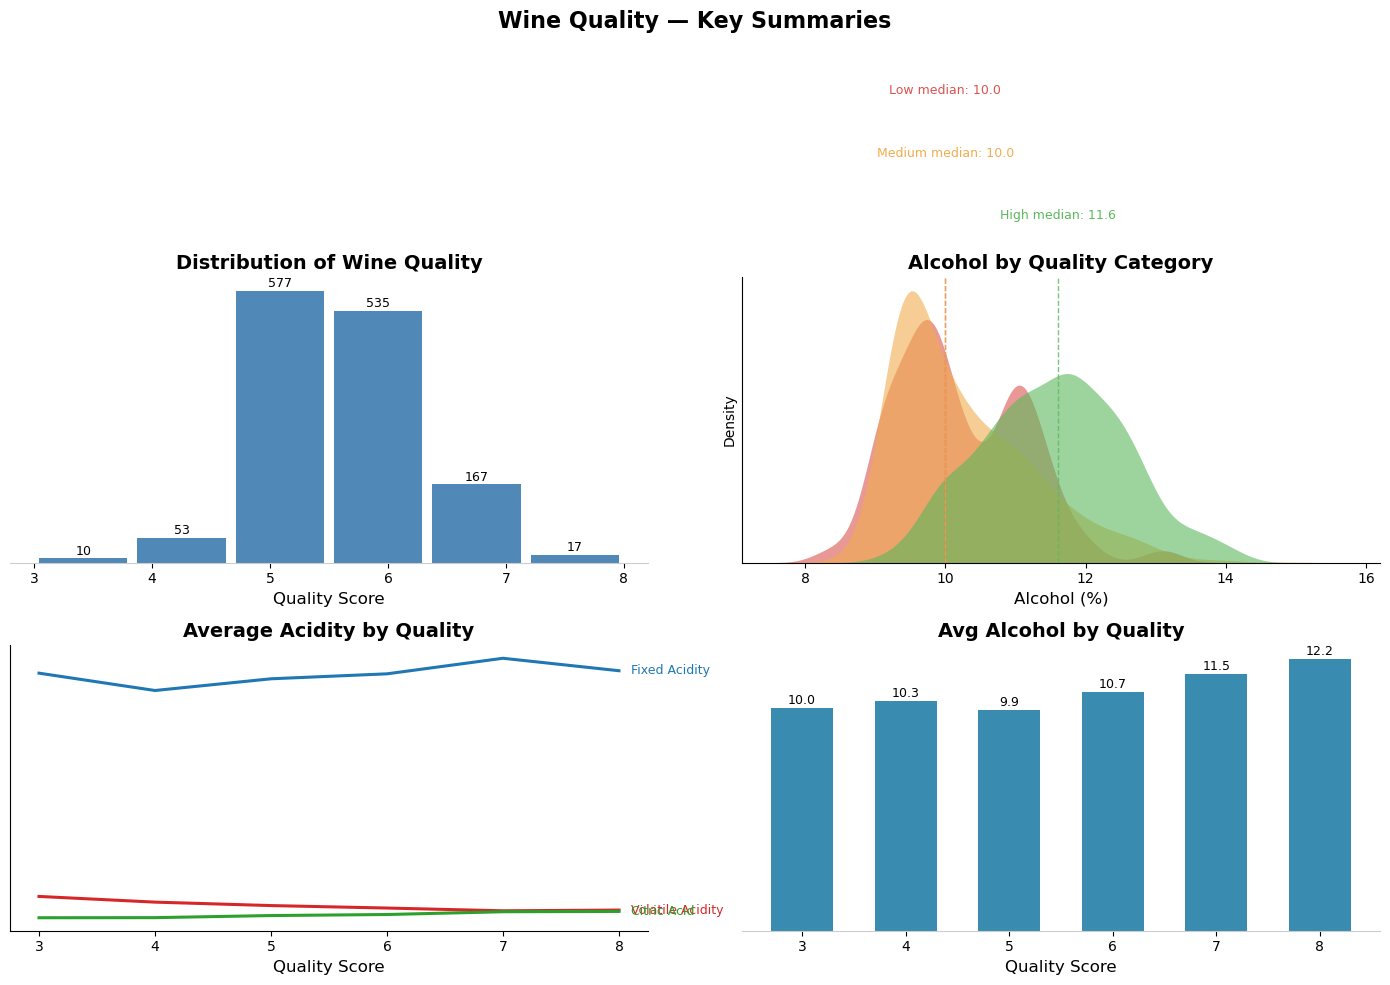

This multi-plot visualization (data-ink focused) shows four concise summaries of the wine dataset:
1. Quality distribution with direct counts
2. Alcohol distributions by category (medians labeled)
3. Direct-labeled acidity trends by quality
4. Average alcohol with direct bar labels


In [32]:
# Create figure with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# === Subplot 1: Histogram of Quality Distribution (data-ink optimized) ===
counts, bins = np.histogram(df_clean['quality'], bins=6)
ax1.bar((bins[:-1] + bins[1:]) / 2, counts, width=(bins[1] - bins[0]) * 0.9, 
        color='steelblue', alpha=0.95)
# Remove non-essential ink
for spine in ['top', 'right', 'left']:
    ax1.spines[spine].set_visible(False)
ax1.spines['bottom'].set_color('#CCCCCC')
ax1.set_title('Distribution of Wine Quality', fontsize=14, fontweight='bold')
ax1.set_xlabel('Quality Score', fontsize=12)
ax1.set_yticks([])  # counts are labeled directly
# Direct labels for each bin
for c, left, right in zip(counts, bins[:-1], bins[1:]):
    ax1.text((left + right) / 2, c + 0.8, str(int(c)), ha='center', va='bottom', fontsize=9)

# === Subplot 2: Alcohol content by quality category (compact) ===
ax2_width = 0.6
for i, (category, color) in enumerate(colors.items()):
    data = df_clean[df_clean['quality_category'] == category]['alcohol']
    sns.kdeplot(data, fill=True, bw_method=0.3, ax=ax2, color=color, alpha=0.6, linewidth=0)
    med = data.median()
    # light median marker and label
    ax2.axvline(med, color=color, linestyle='--', linewidth=1, alpha=0.8)
    ax2.text(med, 0.9 - i * 0.12, f'{category} median: {med:.1f}', ha='center', fontsize=9, color=color)
# Simplify axes
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)
ax2.set_title('Alcohol by Quality Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Alcohol (%)', fontsize=12)
ax2.set_yticks([])

# === Subplot 3: Line plot of average properties by quality (direct labels) ===
quality_avg = df_clean.groupby('quality')[['fixed acidity', 'volatile acidity', 'citric acid']].mean()
colors_line = {'fixed acidity': '#1f77b4', 'volatile acidity': '#d62728', 'citric acid': '#2ca02c'}
for name, col in [('Fixed Acidity', 'fixed acidity'), ('Volatile Acidity', 'volatile acidity'), ('Citric Acid', 'citric acid')]:
    y = quality_avg[col].values
    ax3.plot(quality_avg.index, y, linewidth=2.2, label=name, color=colors_line[col])
    # direct label at the last point
    ax3.text(quality_avg.index[-1] + 0.1, y[-1], name, fontsize=9, color=colors_line[col], va='center')
# clean axes
for spine in ['top', 'right']:
    ax3.spines[spine].set_visible(False)
ax3.set_title('Average Acidity by Quality', fontsize=14, fontweight='bold')
ax3.set_xlabel('Quality Score', fontsize=12)
ax3.set_ylabel('')
ax3.yaxis.grid(True, color='#F5F5F5')
ax3.set_yticks([])

# === Subplot 4: Bar plot of average alcohol by quality (direct labels) ===
avg_alcohol = df_clean.groupby('quality')['alcohol'].mean()
bars = ax4.bar(avg_alcohol.index, avg_alcohol.values, color='#2E86AB', alpha=0.95, width=0.6)
for spine in ['top', 'right', 'left']:
    ax4.spines[spine].set_visible(False)
ax4.spines['bottom'].set_color('#CCCCCC')
ax4.set_title('Avg Alcohol by Quality', fontsize=14, fontweight='bold')
ax4.set_xlabel('Quality Score', fontsize=12)
ax4.set_yticks([])
# direct labels on bars
for bar in bars:
    h = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width() / 2., h + 0.05, f'{h:.1f}', ha='center', va='bottom', fontsize=9)

# Single, concise super title
fig.suptitle('Wine Quality — Key Summaries', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("This multi-plot visualization (data-ink focused) shows four concise summaries of the wine dataset:")
print("1. Quality distribution with direct counts")
print("2. Alcohol distributions by category (medians labeled)")
print("3. Direct-labeled acidity trends by quality")
print("4. Average alcohol with direct bar labels")

#### **Plot 3: Bar Plot with Advanced Customization**

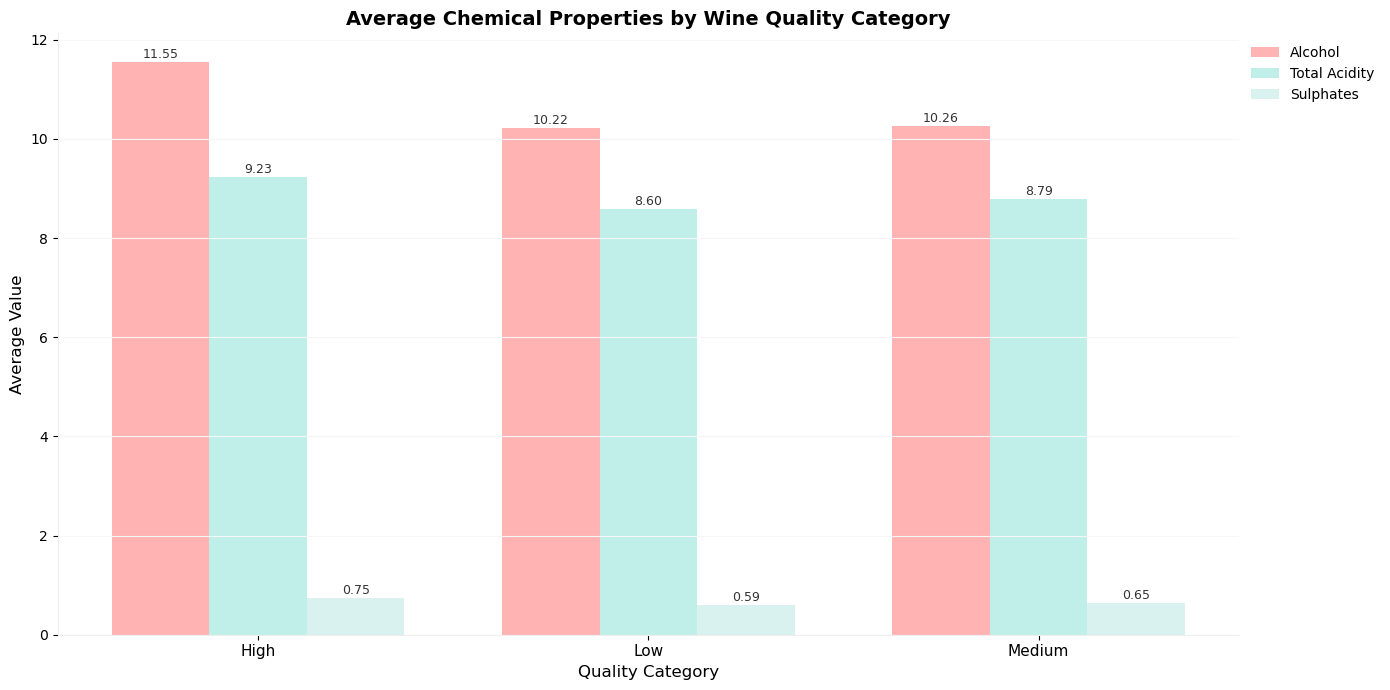

Clean grouped bars: reduced edge ink, soft grids, and direct labels.


In [33]:
# Create figure (data-ink optimized)
fig, ax = plt.subplots(figsize=(14, 7))

# Calculate average values for key properties by quality category
category_avg = df_clean.groupby('quality_category')[
    ['alcohol', 'total_acidity', 'sulphates']].mean()

# Set up bar positions
x = np.arange(len(category_avg.index))
width = 0.25

# Use softer fill colors and remove heavy edge ink
bars1 = ax.bar(x - width, category_avg['alcohol'], width, 
               label='Alcohol', color='#FFB3B3', edgecolor='none')
bars2 = ax.bar(x, category_avg['total_acidity'], width, 
               label='Total Acidity', color='#BFEFE8', edgecolor='none')
bars3 = ax.bar(x + width, category_avg['sulphates'], width, 
               label='Sulphates', color='#D9F2EF', edgecolor='none')

# Clean axes
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#EEEEEE')
ax.spines['bottom'].set_color('#EEEEEE')

ax.set_title('Average Chemical Properties by Wine Quality Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Quality Category', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(category_avg.index, fontsize=11)

# legend minimal and outside (frame off)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

# Soft y grid only
ax.grid(axis='y', color='#F6F6F6', linewidth=0.8)

# Add direct labels on bars (small, unobtrusive)
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9, color='#333333')

add_bar_labels(bars1)
add_bar_labels(bars2)
add_bar_labels(bars3)

plt.tight_layout()
plt.show()

print("Clean grouped bars: reduced edge ink, soft grids, and direct labels.")

---

### **Part 2: Seaborn Recreations**

In [34]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

#### **Seaborn Version of Plot 1: Scatter Plot**

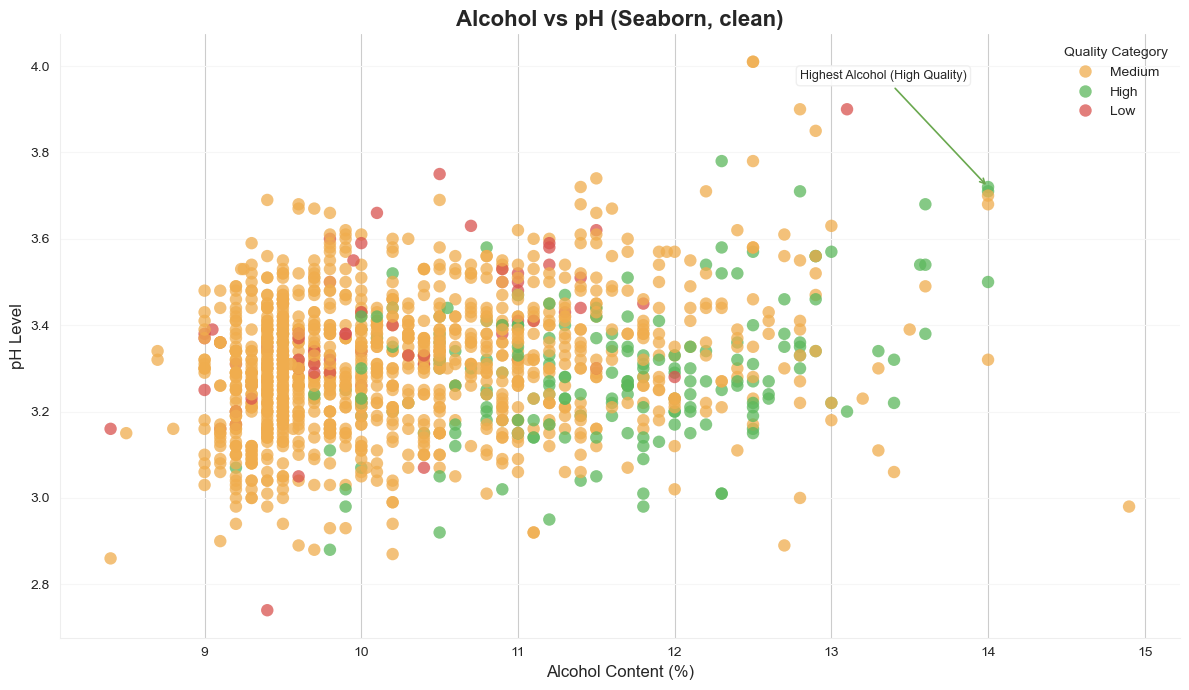

Seaborn scatter (clean): lighter ink and minimal legend.


In [35]:
# Create figure (data-ink optimized)
plt.figure(figsize=(12, 7))

# Create scatter plot using seaborn with reduced ink
sns.scatterplot(data=df_clean, 
                x='alcohol', 
                y='pH',
                hue='quality_category',
                palette={'Low': '#d9534f', 'Medium': '#f0ad4e', 'High': '#5cb85c'},
                s=80,
                alpha=0.75,
                edgecolor='none')

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#EEEEEE')
ax.spines['bottom'].set_color('#EEEEEE')

plt.title('Alcohol vs pH (Seaborn, clean)', fontsize=16, fontweight='bold')
plt.xlabel('Alcohol Content (%)', fontsize=12)
plt.ylabel('pH Level', fontsize=12)

# Minimal legend (frame off)
plt.legend(title='Quality Category', fontsize=10, frameon=False, loc='upper right')

# Light y-grid only
ax.grid(axis='y', color='#F6F6F6', linewidth=0.8)

# Add subtle annotation
high_quality_wines = df_clean[df_clean['quality'] >= 7]
if len(high_quality_wines) > 0:
    best_wine_idx = high_quality_wines['alcohol'].idxmax()
    best_wine = df_clean.loc[best_wine_idx]
    ax.annotate('Highest Alcohol (High Quality)', 
                xy=(best_wine['alcohol'], best_wine['pH']),
                xytext=(best_wine['alcohol'] - 1.2, best_wine['pH'] + 0.25),
                arrowprops=dict(arrowstyle='->', color='#6AA84F', lw=1.2),
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#EEEEEE', alpha=0.9))

plt.tight_layout()
plt.show()

print("Seaborn scatter (clean): lighter ink and minimal legend.")

#### **Seaborn Version of Plot 2: Multi-Plot Dashboard**

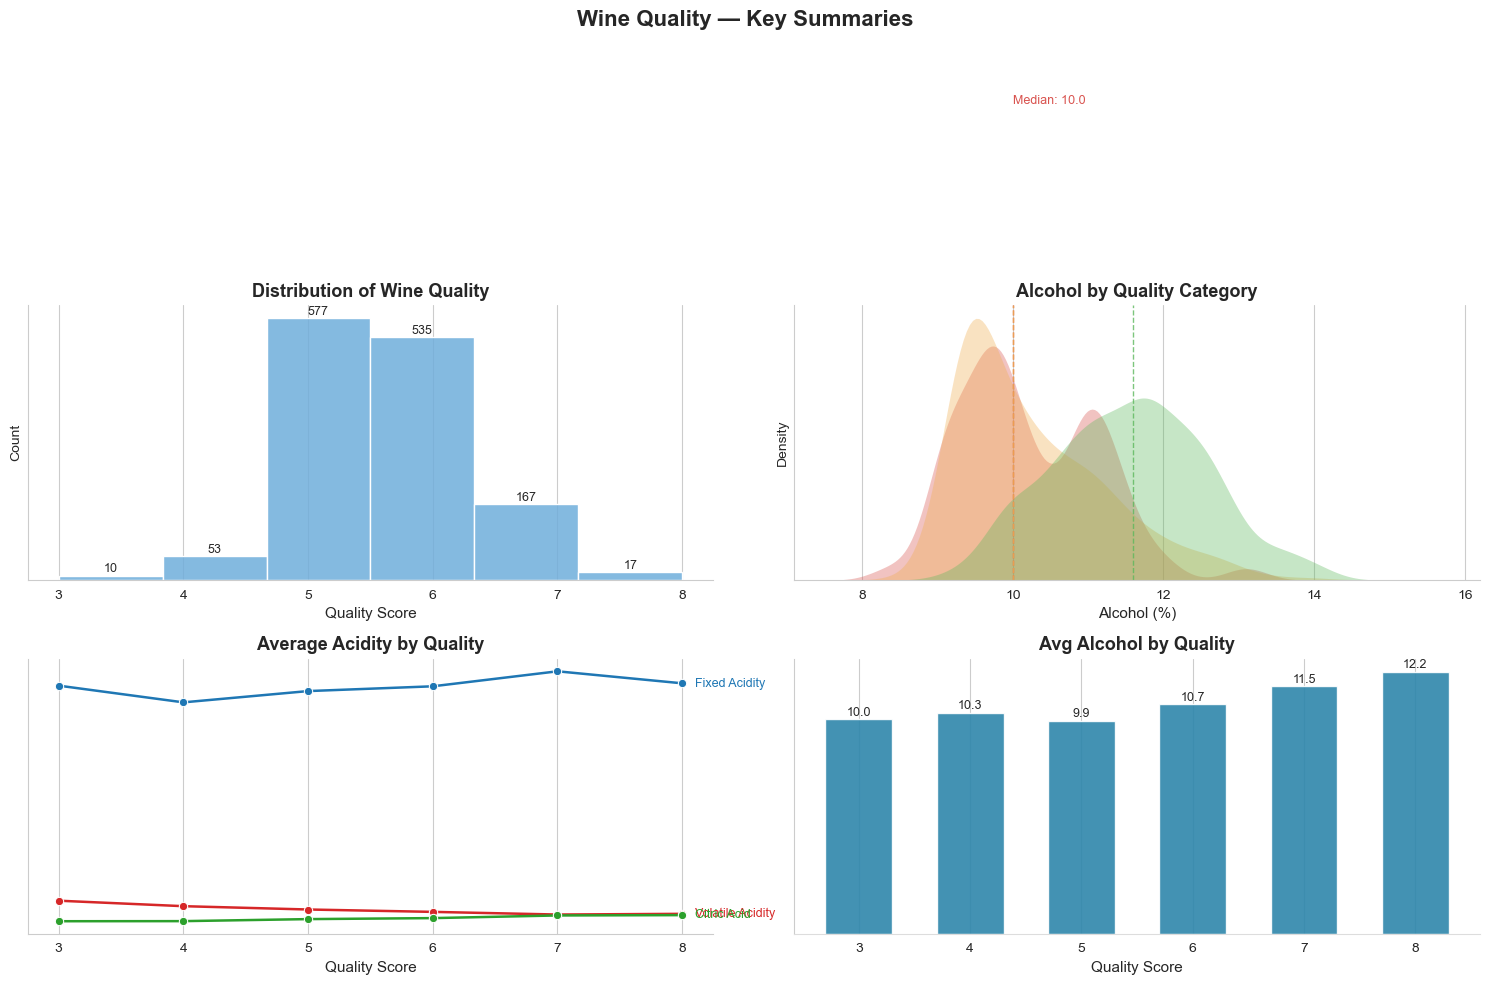

Seaborn multi-plot (clean): consistent soft fills, direct labels, and minimal spines.


In [36]:
# Create figure with subplots (data-ink optimized)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Histogram of Quality Distribution (soft fill, no heavy edges)
sns.histplot(data=df_clean, x='quality', bins=6, 
             color='#6FAEDB', edgecolor=None, 
             alpha=0.85, ax=ax1)
ax1.set_title('Distribution of Wine Quality', fontsize=13, fontweight='bold')
ax1.set_xlabel('Quality Score', fontsize=11)
ax1.set_yticks([])  # counts are labeled directly
# direct labels for each bin
counts, bins = np.histogram(df_clean['quality'], bins=6)
for c, left, right in zip(counts, bins[:-1], bins[1:]):
    ax1.text((left + right) / 2, c + 0.6, str(int(c)), ha='center', va='bottom', fontsize=9)
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)

# Subplot 2: Alcohol distribution by category (kde-like fill but soft)
for i, (category, color) in enumerate({'Low':'#d9534f','Medium':'#f0ad4e','High':'#5cb85c'}.items()):
    data = df_clean[df_clean['quality_category'] == category]['alcohol']
    sns.kdeplot(data, fill=True, bw_method=0.3, ax=ax2, color=color, alpha=0.35, linewidth=0)
    med = data.median()
    ax2.axvline(med, color=color, linestyle='--', linewidth=1, alpha=0.8)
    if i == 0:
        ax2.text(med, 0.95, f'Median: {med:.1f}', ha='left', fontsize=9, color=color)
for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)
ax2.set_title('Alcohol by Quality Category', fontsize=13, fontweight='bold')
ax2.set_xlabel('Alcohol (%)', fontsize=11)
ax2.set_yticks([])

# Subplot 3: Line plot with direct labels
quality_avg = df_clean.groupby('quality')[['fixed acidity', 'volatile acidity', 'citric acid']].mean().reset_index()
cols = [('Fixed Acidity','fixed acidity','#1f77b4'), ('Volatile Acidity','volatile acidity','#d62728'), ('Citric Acid','citric acid','#2ca02c')]
for name, col, color in cols:
    sns.lineplot(data=quality_avg, x='quality', y=col, marker='o', linewidth=1.8, markersize=6, color=color, ax=ax3)
    # direct label at last point
    ax3.text(quality_avg['quality'].iloc[-1] + 0.1, quality_avg[col].iloc[-1], name, fontsize=9, color=color, va='center')
for spine in ['top', 'right']:
    ax3.spines[spine].set_visible(False)
ax3.set_title('Average Acidity by Quality', fontsize=13, fontweight='bold')
ax3.set_xlabel('Quality Score', fontsize=11)
ax3.set_ylabel('')
ax3.set_yticks([])
ax3.yaxis.grid(True, color='#F5F5F5')

# Subplot 4: Bar plot (soft fill, direct labels)
avg_alcohol_df = df_clean.groupby('quality')['alcohol'].mean().reset_index()
bars = ax4.bar(avg_alcohol_df['quality'], avg_alcohol_df['alcohol'], color='#2E86AB', alpha=0.9, width=0.6, edgecolor=None)
for spine in ['top', 'right']:
    ax4.spines[spine].set_visible(False)
ax4.spines['bottom'].set_color('#DDDDDD')
ax4.set_title('Avg Alcohol by Quality', fontsize=13, fontweight='bold')
ax4.set_xlabel('Quality Score', fontsize=11)
ax4.set_yticks([])
for bar in bars:
    h = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width() / 2., h + 0.03, f'{h:.1f}', ha='center', va='bottom', fontsize=9)

fig.suptitle('Wine Quality — Key Summaries', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Seaborn multi-plot (clean): consistent soft fills, direct labels, and minimal spines.")

#### **Seaborn Version of Plot 3: Grouped Bar Plot**

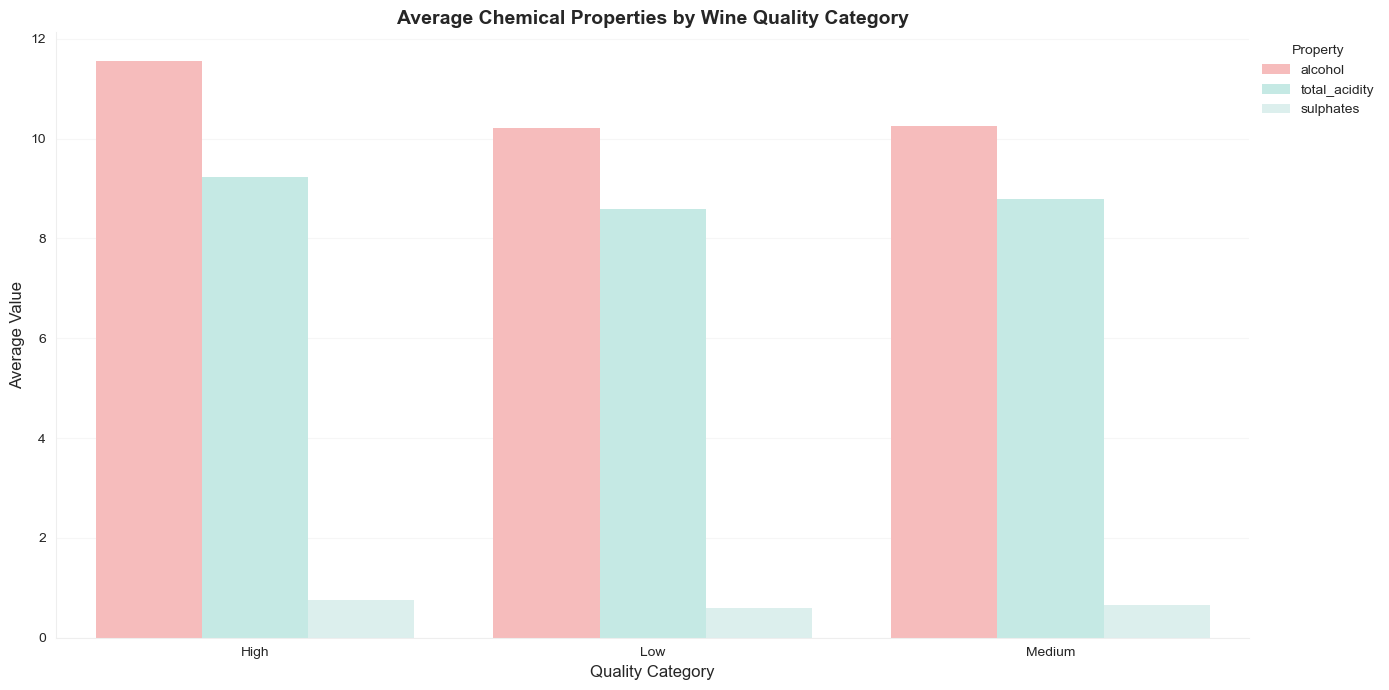

Seaborn grouped bar (clean): soft fills, reduced spine ink, minimal legend.


In [37]:
# Prepare data for seaborn (clean styling)
category_avg_long = df_clean.groupby('quality_category')[
    ['alcohol', 'total_acidity', 'sulphates']].mean().reset_index()
category_avg_melted = category_avg_long.melt(id_vars='quality_category', 
                                               var_name='Property', 
                                               value_name='Average Value')

# Create figure
plt.figure(figsize=(14, 7))

# Create grouped bar plot with softer fills and no heavy edges
ax = sns.barplot(data=category_avg_melted, 
                 x='quality_category', 
                 y='Average Value',
                 hue='Property',
                 palette=['#FFB3B3', '#BFEFE8', '#D9F2EF'],
                 edgecolor='none')

# Clean up axes
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_color('#EEEEEE')
ax.spines['bottom'].set_color('#EEEEEE')

plt.title('Average Chemical Properties by Wine Quality Category', fontsize=14, fontweight='bold')
plt.xlabel('Quality Category', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# Place minimal legend outside (frame off)
plt.legend(title='Property', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

# Soft y-grid only
ax.grid(axis='y', color='#F6F6F6', linewidth=0.8)

plt.tight_layout()
plt.show()

print("Seaborn grouped bar (clean): soft fills, reduced spine ink, minimal legend.")

#### **Bonus: Additional Seaborn Visualizations**

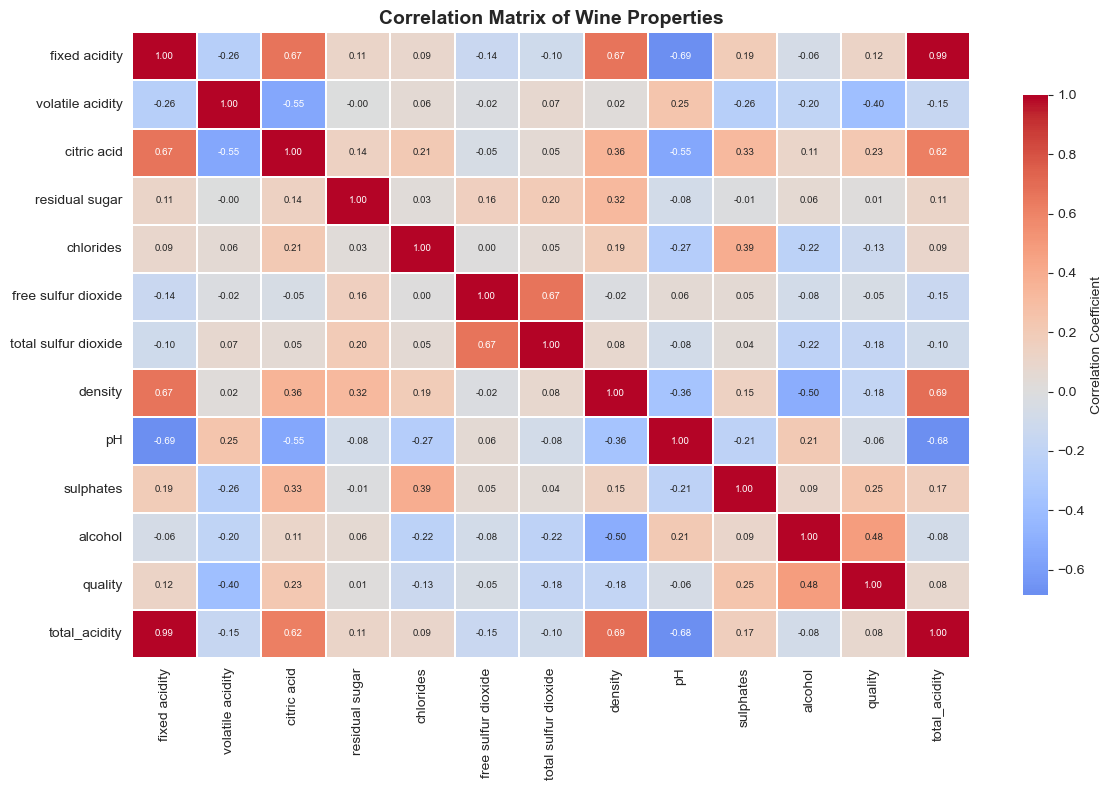

Bonus visualization: Correlation heatmap (clean): lighter gridlines and smaller annotation font.


In [38]:
# Create a correlation heatmap (cleaned appearance)
plt.figure(figsize=(12, 8))

correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, 
            linewidths=0.3, linecolor='#FFFFFF',
            annot_kws={'fontsize':7},
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8})

plt.title('Correlation Matrix of Wine Properties', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Bonus visualization: Correlation heatmap (clean): lighter gridlines and smaller annotation font.")

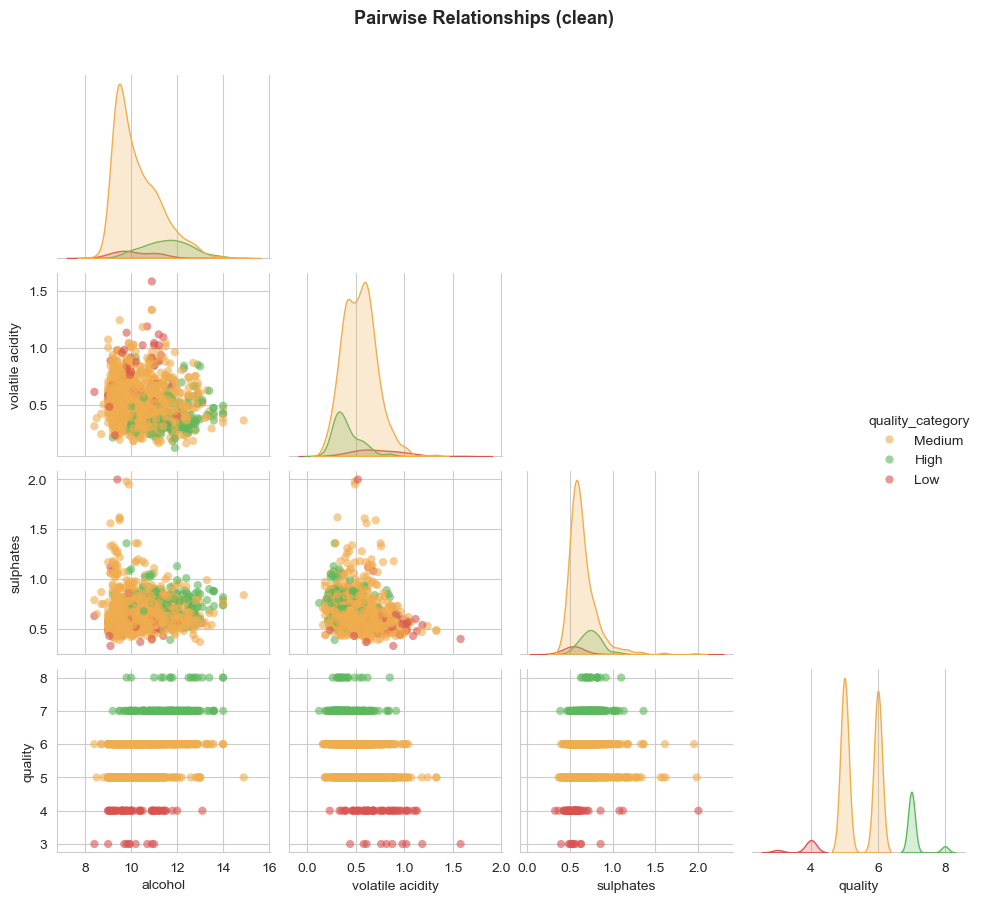

Pairplot (clean): corner view with reduced marker ink to focus on relationships.


In [39]:
# Create a pairplot for key variables (clean, corner to reduce ink)
key_vars = ['alcohol', 'volatile acidity', 'sulphates', 'quality']
pairplot = sns.pairplot(df_clean[key_vars + ['quality_category']], 
                        hue='quality_category',
                        palette={'Low':'#d9534f','Medium':'#f0ad4e','High':'#5cb85c'},
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 35, 'edgecolor': 'none'},
                        height=2.2, corner=True)
# smaller suptitle for cleaner layout
pairplot.fig.suptitle('Pairwise Relationships (clean)', fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Pairplot (clean): corner view with reduced marker ink to focus on relationships.")

---

### **Part 3: Comparison of Matplotlib vs Seaborn**

**Based on the visualizations created above, here are the key differences between Matplotlib and Seaborn:**

**Matplotlib:**
- **Lower-level control**: Matplotlib provides granular control over every aspect of the plot, allowing for precise customization of individual elements.
- **More verbose syntax**: Requires more lines of code to achieve the same result, especially for complex statistical visualizations.
- **Manual configuration**: Colors, styles, and legends need to be manually configured for each plot element.
- **Flexibility**: Best for creating highly customized, publication-quality figures where you need complete control.
- **Learning curve**: Steeper learning curve for beginners but offers unlimited customization possibilities.

**Seaborn:**
- **Higher-level interface**: Built on top of Matplotlib, providing a simpler, more intuitive API for common statistical plots.
- **Concise syntax**: Accomplishes complex visualizations with fewer lines of code.
- **Automatic styling**: Comes with beautiful default themes and color palettes that work well out-of-the-box.
- **Statistical focus**: Designed specifically for statistical data visualization with built-in functions for heatmaps, pairplots, distribution plots, etc.
- **DataFrame integration**: Works seamlessly with pandas DataFrames, making it easier to plot grouped data.
- **Best practices**: Encourages best practices in data visualization through its design.

**When to use each:**
- Use **Matplotlib** when you need precise control over every element, creating custom plots, or building complex multi-panel figures from scratch.
- Use **Seaborn** when you want to quickly create beautiful statistical visualizations, explore data relationships, or need common plot types with minimal code.

**In practice**: Many data scientists use both libraries together—Seaborn for quick exploratory analysis and statistical plots, then fine-tune with Matplotlib commands for final publication-ready figures.

---

## **Conclusions**

### Summary of Findings

After exploring the Red Wine Quality dataset, several interesting patterns emerged:

1. **Alcohol Content is Key**: There is a clear positive correlation between alcohol content and wine quality. Higher-quality wines (score 7-8) have an average alcohol content of 11-12%, while lower-quality wines average around 10%.

2. **Acidity Matters**: Volatile acidity shows a negative correlation with quality—wines with lower volatile acidity tend to be rated higher. Fixed acidity and citric acid levels remain relatively stable across quality categories.

3. **Quality Distribution**: Most wines in the dataset are rated as "Medium" quality (scores 5-6), with very few wines receiving extremely low (≤4) or high (≥8) ratings. This suggests that professional wine ratings tend to cluster around average values.

4. **Chemical Balance**: High-quality wines demonstrate a careful balance of chemical properties—higher alcohol and sulphates, but controlled acidity levels. This indicates that wine quality is not determined by a single factor but by the interaction of multiple components.
5. **No Missing Data**: The dataset was remarkably clean with no missing values, though some duplicate entries were removed during wrangling.

**Visualization Insights**: Through this assignment, I learned that:
- **Matplotlib** excels when you need precise, pixel-perfect control over your visualizations
- **Seaborn** dramatically reduces coding time for statistical visualizations and produces publication-ready figures with minimal effort
- Combining both libraries provides the best of both worlds—quick exploration with Seaborn and fine-tuning with Matplotlib
- Applied the data ink ratio learnings from other assignments to the visuals on this one.

**Practical Applications**: These findings could help winemakers optimize their production processes by understanding which chemical properties most strongly influence perceived quality, potentially improving product development and quality control procedures.

---

## **References**

- Dataset: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
- UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/wine+quality
- Matplotlib Documentation: https://matplotlib.org/
- Seaborn Documentation: https://seaborn.pydata.org/